# **Installations:**

In [27]:
# !pip install config
# !pip install shap # For Model Interpretability.
# !pip install spacy # For extracting nouns.
# !pip install en_core_web_md # Also for extracting nouns.
# !pip install DframCy

# **Imports:**

In [2]:
import pandas as pd  # To read the csv file to a data frame.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import config
import os
from datetime import datetime
import shap

import spacy # For extracting nouns.
import en_core_web_sm # Also for extracting nouns.
from dframcy import DframCy # For converting Spacy to Pandas.

Can't initialize NVML


In [3]:
# Imported libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Data Upload:**

Import excel edited data frame updated with zeroes.

In [28]:
df_comments_pcs_depression_per_month_year = pd.read_csv ('/comments_pcs_depression_per_month_year_DAF.csv')
df_comments_pcs_depression_per_month_year

,Month_in_Year,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined,Monthly_PCS_Comments_Combined,Monthly_Depression_Comments_Combined,PCS_Comments_per_Month_in_Year_shift4,PCS_Comments_per_Month_in_Year_shift8
0,2011-09,1.0,0.0,1.0,"' . anything outstanding , work get payment pl...",0,"' . anything outstanding , work get payment pl...",0.0,0.0
1,2011-10,1.0,1.0,0.0,'their story touching tell truly love ! wish b...,'their story touching tell truly love ! wish b...,0,0.0,0.0
2,2011-11,0.0,0.0,0.0,0,0,0,0.0,0.0
3,2011-12,0.0,0.0,0.0,0,0,0,0.0,0.0
4,2012-01,1.0,1.0,0.0,"'thank , good know done ! lot leg strength ( m...","'thank , good know done ! lot leg strength ( m...",0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
130,2022-07,5.0,1.0,4.0,"'hi , post removed since new account . reviewe...","'hi , post removed since new account . reviewe...",'just wait cup havent even posted best shit . ...,3.0,4.0
131,2022-08,4.0,2.0,2.0,"' say every time ellsworth comes , really enjo...","' say every time ellsworth comes , really enjo...",'can confirm . source : worked afc . personall...,1.0,4.0
132,2022-09,2.0,0.0,2.0,"' choked monster ''that odd , service , suppos...",0,"' choked monster ''that odd , service , suppos...",3.0,3.0
133,2022-10,4.0,2.0,2.0,' could see trying force people work american ...,' could see trying force people work american ...,"' im smart join , ill go debt 4 years go work ...",1.0,1.0


* 4 Techniques to Handle Missing values in Time Series Data
  * https://towardsdatascience.com/4-techniques-to-handle-missing-values-in-time-series-data-c3568589b5a8 

In [29]:
df_comments_pcs_depression_per_month_year['Monthly_PCS_Comments_Combined'] = df_comments_pcs_depression_per_month_year['Monthly_PCS_Comments_Combined'].fillna('0')
df_comments_pcs_depression_per_month_year # Last Observation Carried Forward.


,Month_in_Year,Comments_per_Month_in_Year,PCS_Comments_per_Month_in_Year,Depression_Comments_per_Month_in_Year,Monthly_Comments_Combined,Monthly_PCS_Comments_Combined,Monthly_Depression_Comments_Combined,PCS_Comments_per_Month_in_Year_shift4,PCS_Comments_per_Month_in_Year_shift8
0,2011-09,1.0,0.0,1.0,"' . anything outstanding , work get payment pl...",0,"' . anything outstanding , work get payment pl...",0.0,0.0
1,2011-10,1.0,1.0,0.0,'their story touching tell truly love ! wish b...,'their story touching tell truly love ! wish b...,0,0.0,0.0
2,2011-11,0.0,0.0,0.0,0,0,0,0.0,0.0
3,2011-12,0.0,0.0,0.0,0,0,0,0.0,0.0
4,2012-01,1.0,1.0,0.0,"'thank , good know done ! lot leg strength ( m...","'thank , good know done ! lot leg strength ( m...",0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
130,2022-07,5.0,1.0,4.0,"'hi , post removed since new account . reviewe...","'hi , post removed since new account . reviewe...",'just wait cup havent even posted best shit . ...,3.0,4.0
131,2022-08,4.0,2.0,2.0,"' say every time ellsworth comes , really enjo...","' say every time ellsworth comes , really enjo...",'can confirm . source : worked afc . personall...,1.0,4.0
132,2022-09,2.0,0.0,2.0,"' choked monster ''that odd , service , suppos...",0,"' choked monster ''that odd , service , suppos...",3.0,3.0
133,2022-10,4.0,2.0,2.0,' could see trying force people work american ...,' could see trying force people work american ...,"' im smart join , ill go debt 4 years go work ...",1.0,1.0


In [30]:
predictor_text_to_target_df = df_comments_pcs_depression_per_month_year[['Monthly_PCS_Comments_Combined','Depression_Comments_per_Month_in_Year']]
predictor_text_to_target_df

,Monthly_PCS_Comments_Combined,Depression_Comments_per_Month_in_Year
0,0,1.0
1,'their story touching tell truly love ! wish b...,0.0
2,0,0.0
3,0,0.0
4,"'thank , good know done ! lot leg strength ( m...",0.0
...,...,...
130,"'hi , post removed since new account . reviewe...",4.0
131,"' say every time ellsworth comes , really enjo...",2.0
132,0,2.0
133,' could see trying force people work american ...,2.0


In [10]:
# Save and download most recent dataframe:
from google.colab import files
df_comments_pcs_depression_per_month_year.to_csv('pcs_depression_combined_monthly_texts.csv', encoding = 'utf-8-sig') 
files.download('pcs_depression_combined_monthly_texts.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Vectorize PCS comments to convert text to numerical variables for Regression and SHAP input:

* CountVectorizer
  * https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 
    * Convert a collection of text documents to a matrix of token counts.
  * Using CountVectorizer to Extracting Features from Text
    * https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
      * "CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample."

In [31]:
# Vectorize Monthly_PCS_Comments_Combined: 
PCS_document_features = df_comments_pcs_depression_per_month_year['Monthly_PCS_Comments_Combined']
PCS_vectorizer = CountVectorizer()
PCS_documents_as_input_vector = PCS_vectorizer.fit_transform(PCS_document_features)

Correlation analysis

In [32]:
df_depression = df_comments_pcs_depression_per_month_year['Depression_Comments_per_Month_in_Year']

* pandas.DataFrame.sparse.from_spmatrix
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sparse.from_spmatrix.html 
* pandas.DataFrame.join
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [33]:
import scipy.sparse
mat = PCS_documents_as_input_vector
df_vectorizer = pd.DataFrame.sparse.from_spmatrix(mat)
df_vectorizer

,0,1,2,3,4,5,6,7,8,9,...,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_vectorizer_dep = df_vectorizer.join(df_depression)
df_vectorizer_dep

,0,1,2,3,4,5,6,7,8,9,...,2075,2076,2077,2078,2079,2080,2081,2082,2083,Depression_Comments_per_Month_in_Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
131,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2.0
132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0


In [106]:
from google.colab import files
df_vectorizer_dep.to_csv('vectorizer_dep_DAF.csv', encoding = 'utf-8-sig') 
files.download('vectorizer_dep_DAF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import seaborn as sb
import seaborn as sns

In [17]:
from scipy.stats import norm

* sklearn.linear_model.LinearRegression
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [94]:
from pandas.core.groupby.ops import Shape

# Establish independent variable as PCS comments per month in year and PCS documents as input vector.
x = PCS_documents_as_input_vector
# Establish dependent variable as depression comments per month in year.
y = df_comments_pcs_depression_per_month_year['Depression_Comments_per_Month_in_Year']
# Splits training and testing data.
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=.2, random_state=2)

* Linear Regression (Python Implementation)
  * https://www.geeksforgeeks.org/linear-regression-python-implementation/

In [95]:
# create linear regression object
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)
# train the model using the training sets
# linear_regression_model = reg.fit(x_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
print('Intercepts: ', reg.intercept_)  

Coefficients:  [-0.01864794 -0.06704983 -0.03018993 ...  0.44394269 -0.00312702
 -0.02985254]
Intercepts:  1.0645162324238715


In [98]:
reg.score(x, y)

0.8830180156241542

In [99]:
reg.score(x_test, y_test)

0.8086457694982832

* Coefficient of determination
  * https://en.wikipedia.org/wiki/Coefficient_of_determination
  * Data Science One on One — Part 19: Interpreting Regression Output
    * https://medium.com/@polanitzer/data-science-one-on-one-part-19-interpreting-regression-output-in-excel-fc7d49be63f
      * "The coefficient of multiple correlation is simply the square root of R-squared. In the case of a multiple regression, the coefficient of multiple correlation is always positive."
* Coefficient of multiple correlation
  * https://en.wikipedia.org/wiki/Coefficient_of_multiple_correlation 
    * "In statistics, the coefficient of multiple correlation is a measure of how well a given variable can be predicted using a linear function of a set of other variables. It is the correlation between the variable's values and the best predictions that can be computed linearly from the predictive variables."
* sklearn.linear_model.LinearRegression
    * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
    * score(X, y[, sample_weight])
      * Return the coefficient of determination of the prediction.


In [46]:
import math 

In [100]:
math.sqrt(reg.score(x, y))

0.9396903828517956

Coefficient of Multiple Correlation

In [101]:
math.sqrt(reg.score(x_test, y_test))

0.8992473349964865

In [103]:
linear_regression_model = reg.fit(x, y)
explainer = shap.Explainer(linear_regression_model,x_train,feature_names=PCS_vectorizer.get_feature_names_out())
shap_values = explainer(x_test)

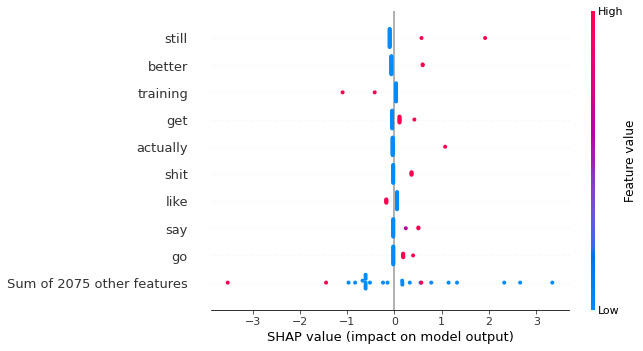

In [104]:
shap.plots.beeswarm(shap_values)

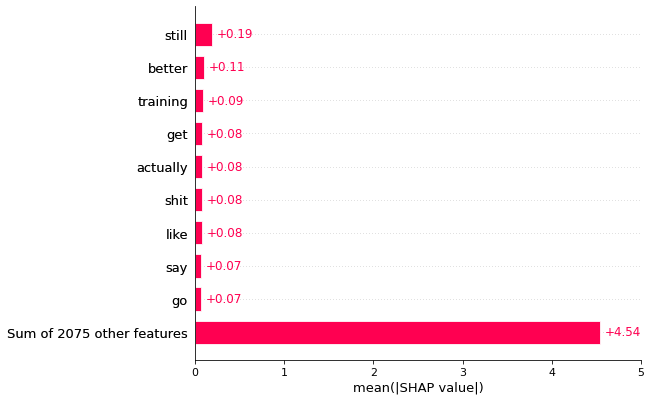

In [105]:
shap.plots.bar(shap_values)